# Importing required Libraries and csv files

In [15]:
##importing libraries
import pandas as pd
import matplotlib
import openpyxl
import xlsxwriter
import numpy as np
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt



In [69]:
##reading csv files
circuits = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\circuits.csv')
constructor_results = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\constructor_results.csv')
constructor_standings = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\constructor_standings.csv')
constructors = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\constructors.csv')
driver_standings = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\driver_standings.csv')
drivers = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\drivers.csv')
lap_times = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\lap_times.csv')
pit_stops = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\pit_stops.csv')
qualifying = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\qualifying.csv')
races = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\races.csv')
results = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\results.csv')
seasons = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\seasons.csv')
sprint_results= pd.read_csv(r'C:\Users\Samarth\Desktop\archive\sprint_results.csv')
status = pd.read_csv(r'C:\Users\Samarth\Desktop\archive\status.csv')

# Formula 1 circuits Analysis
### 1) Finding the total number of circuits in world
### 2) Finding the distribution of circuits over different countries
### 3) Plotting the circuits on world map


In [285]:
#No of Formula-1 circuits by country 
circuits_list = circuits.groupby('country', as_index=False).agg({"circuitId": "count"}).sort_values(by='circuitId',ascending=False)
circuits_list.rename(columns={'circuitId' : 'count'},inplace=True)
Total_circuits = circuits_list.sum()['count']

In [132]:
import plotly.express as py
import pandas as pd

print('Total circuits = %d'%Total_circuits)
print('TOP COUNTRIES')
print(circuits_list.head())
print('\n')

fig = py.scatter_geo(circuits,lat='lat',lon='lng', hover_name="location")
fig.update_layout(title = 'Formula 1 circuits map')
fig.show()



Total circuits = 79
TOP COUNTRIES
     country  count
33       USA     11
9     France      7
27     Spain      6
21  Portugal      4
32        UK      4




# Creating required Datasets
### Creating list data set to map (drivers, constructors and race) for maping 

In [136]:
#Createing Drivers list for ID mapping
drivers_list = drivers[['driverId', 'forename' , 'surname' ]]
drivers_list['name'] = drivers_list['forename']+" "+drivers_list['surname']
drivers_list = drivers_list[['driverId','name']]

#creating Constructors list for ID mapping
constructors_list = constructors[['constructorId', 'name']]

#crating race list for ID mapping
race_list = races[['raceId', 'year', 'name' ]]
##race_list.groupby('name', as_index=False).agg({"raceId": "count"}).sort_values(by='raceId',ascending=False).head()
results_list = results[['resultId', 'driverId', 'constructorId' ,'position','points' ]]
##results_list.groupby('driverId', as_index=False).agg({"resultId": "count"}).sort_values(by='resultId',ascending=False).head(5)

<ipython-input-136-ee6466d84343>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Formula 1 statistics

### Number of times pole postion attained by driver


In [158]:
#creating Pole position dataset
#Top 10 drivers who attained pole position maximum times
i = 1 
#i is - (1 for pole), 2 for 2nd postion and so on
pos_driver = results_list.loc[results_list['position']==str(i)]
pos_driver = pos_driver.groupby('driverId',as_index=False).agg({'position' : 'count'}).sort_values(by='position', ascending=False)
pos_list = pd.merge(pos_driver, drivers_list, how='left', left_on='driverId', right_on='driverId')
pos_list.rename(columns = {'position':'no_of_times_position_attained', 'name':'driver'}, inplace = True)
pos_list = pos_list[['driver', 'no_of_times_position_attained']].head(10)

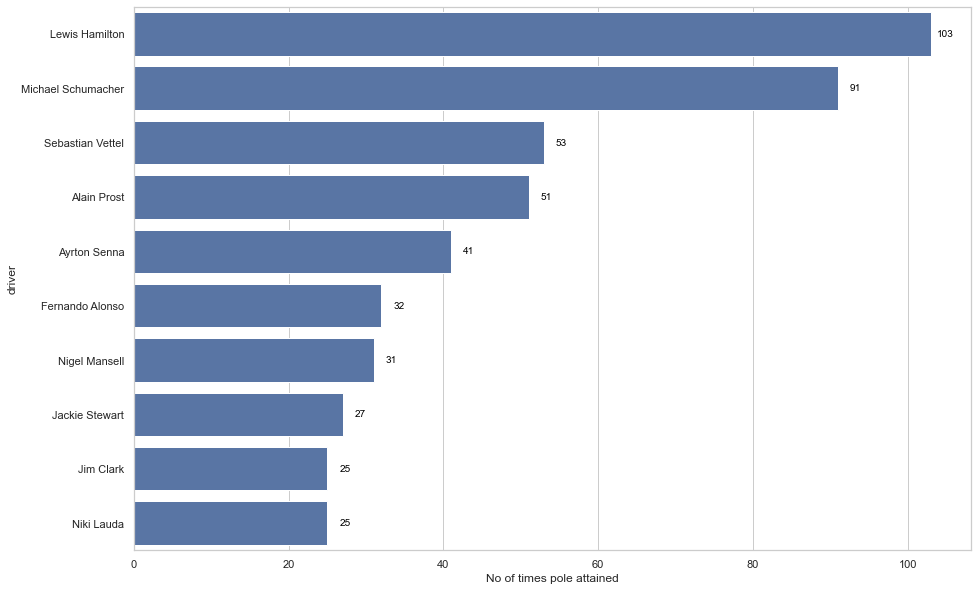

In [169]:
#plotting barplot for pole postion data set

f, ax = plt.subplots(figsize=(15,10))
sns.set(style="whitegrid")
graph = sns.barplot(y=pos_list['driver'], x=pos_list['no_of_times_position_attained'], orient='h',color='b')
graph.set_xlabel("No of times pole attained")

for p in ax.patches:
    ax.text(p.get_width()+3,p.get_y()+p.get_height()/2, '%d' % int(p.get_width()),fontsize=10,color='black', ha='right', va='center')
plt.show()


### Top drivers based on total Points

In [170]:
points_driver = results_list.groupby('driverId',as_index=False).agg({'points' : 'sum'}).sort_values(by='points', ascending=False)
pos_list = pd.merge(points_driver, drivers_list, how='left', left_on='driverId', right_on='driverId')
pos_list.rename(columns = {'points':'total_points', 'name':'driver'}, inplace = True)
pos_list[['driver', 'total_points']].head(10)

,driver,total_points
0,Lewis Hamilton,4178.5
1,Sebastian Vettel,3061.0
2,Fernando Alonso,1982.0
3,Kimi Räikkönen,1873.0
4,Valtteri Bottas,1739.0
5,Nico Rosberg,1594.5
6,Michael Schumacher,1566.0
7,Max Verstappen,1550.5
8,Daniel Ricciardo,1273.0
9,Jenson Button,1235.0


### Top Constructors based on points

In [294]:
points_constructor = results_list.groupby('constructorId',as_index=False).agg({'points' : 'sum'}).sort_values(by='points', ascending=False)
pos_constructor = pd.merge(points_constructor, constructors_list, how='left', left_on='constructorId', right_on='constructorId')
pos_constructor.rename(columns = {'points':'total_points', 'name':'constructor'}, inplace = True)
pos_constructor[['constructor', 'total_points']].head(10)


,constructor,total_points
0,Ferrari,9659.27
1,Mercedes,6455.64
2,McLaren,5997.50
3,Red Bull,5622.00
4,Williams,3590.00
5,Renault,1777.00
6,Force India,1098.00
7,Team Lotus,995.00
8,Benetton,861.50
9,Tyrrell,711.00


### Points of Ferrari over time

<AxesSubplot:xlabel='year', ylabel='points'>

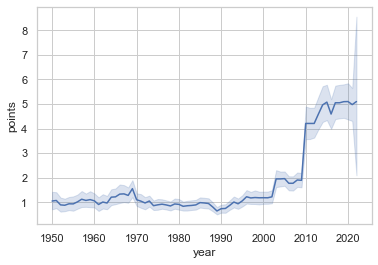

In [318]:
m = 'Ferrari'
results.loc[results['constructorId']==int(constructors_list.loc[constructors_list['name']==m]['constructorId'])]
results_time = pd.merge(results, race_list, on='raceId', how='left')
results_time.groupby('year',as_index=False).agg({'points':'mean'})
sns.lineplot(data=results_time, x='year', y='points')

### No of races with time

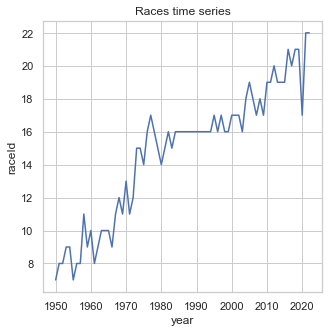

In [178]:
#Races per year
f, ax = plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
races_year = races.groupby('year',as_index=False).agg({'raceId' : 'count'}).sort_values(by='year')
races_year.rename(columns={'raceId' : 'count'})
graph = sns.lineplot(y=races_year['raceId'], x=races_year['year'], color='b')
plt.title("Races time series")
for p in ax.patches:
    ax.text(p.get_width()+0.5, p.get_y()+p.get_height()/2, '%d' % int(p.get_width()),fontsize=12, color='blue', ha='center', va='center')
plt.show()

### Drivers vs Nationality

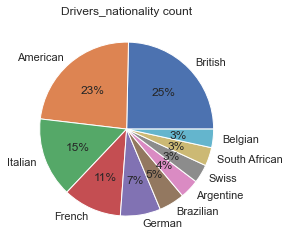

In [199]:
nationality_list = drivers.groupby('nationality',as_index=False).agg({'dob': 'count'}).sort_values(by='dob',ascending=False)
nationality_list.rename(columns={'dob' : 'count'},inplace=True)
nationality_list = nationality_list.head(10)
plt.pie(nationality_list['count'], labels = nationality_list['nationality'],autopct='%.0f%%')
plt.title("Drivers_nationality count")
plt.show()


### Drivers vs age

#### Note -  The age of driver is not the current age but the age at the time of race 


In [235]:
#creating required dataframe
race_year = races[['raceId', 'year']]
drivers_birthyear = drivers[['driverId', 'dob']]

driver_conc = results[['raceId', 'driverId', 'points']]
driver_conc = pd.merge(driver_conc, race_year, how='left', on='raceId')
driver_conc = pd.merge(driver_conc, drivers_birthyear, how = 'left', on='driverId')
driver_conc.rename(columns={'year' : 'race_year'}, inplace=True)
driver_conc['dob'] = pd.to_datetime(driver_conc['dob'])
driver_conc['dob_year']=driver_conc['dob'].apply(lambda x: x.year)
driver_conc['new_age'] = driver_conc['race_year'] - driver_conc['dob_year']

#finding median age
Median_age = driver_conc['new_age'].median()

#finding min age
Min_age = driver_conc['new_age'].min()
#finding driverid for drivers with min age
Min_age_driver = driver_conc.loc[driver_conc['new_age']==Min_age].driverId.unique()
#create empty list to store drivers name
Youngest_drivers=[]
#loop to retrieve drivers name with min age
for i in Min_age_driver:
    x = drivers_list.loc[drivers_list['driverId']==i].name.unique()[0]
    Youngest_drivers.append(x)

#finding max age
Max_age = driver_conc['new_age'].max()
#finding driver id with max age
Max_age_driver = driver_conc.loc[driver_conc['new_age']==Max_age].driverId.unique()
#empty list to store names of driver with max age
Oldest_drivers=[]
#loop to retrieve names of drivers with max age
for i in Max_age_driver:
    x = drivers_list.loc[drivers_list['driverId']==i].name.unique()[0]
    Oldest_drivers.append(x)


Median age of driver 29

Oldest Drivers
Driver: Louis Chiron Age:59


Youngest Drivers
Driver: Thomas Monarch Age:18
Driver: Max Verstappen Age:18




Text(0.5, 1.0, 'driver age mean')

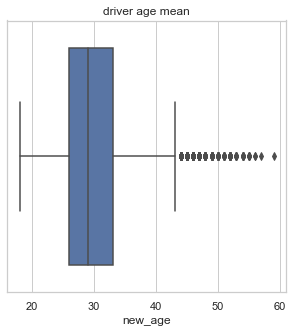

In [422]:
# Plotting age on graph
print('Median age of driver %d\n'%Median_age)
print('Oldest Drivers')
for i in Oldest_drivers:
    print("Driver: %s Age:%d"%(i,Max_age))
print('\n')
print('Youngest Drivers')
for i in Youngest_drivers:
    print("Driver: %s Age:%d"%(i,Min_age))
print('\n')
f, ax = plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
graph = sns.boxplot(x='new_age', data=driver_conc)
plt.title("driver age mean")


### Mean age of drivers over years

Text(0.5, 1.0, 'drivers mean age over years')

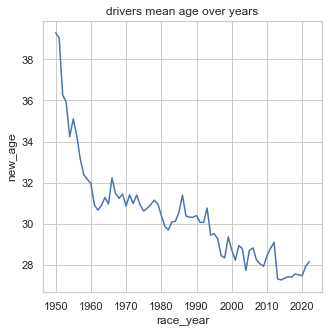

In [242]:
meanage_year = driver_conc.groupby('race_year').agg({'new_age' : 'mean'})
f, ax = plt.subplots(figsize=(5,5))
sns.set(style="whitegrid")
graph = sns.lineplot(x='race_year', y='new_age', data=meanage_year)
plt.title("drivers mean age over years")

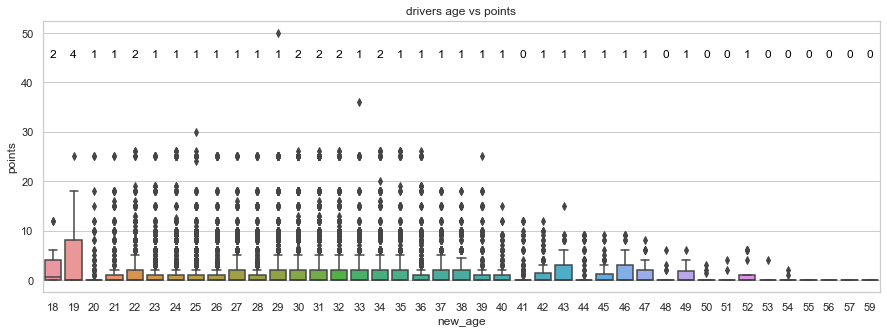

In [273]:
#getting mean and median for data
medians=driver_conc.groupby('new_age',as_index=False).agg({'points':'median'})['points']
means=driver_conc.groupby('new_age',as_index=False).agg({'points':'mean'})['points']

#plotting boxplot to understand poits relation with age
f, ax = plt.subplots(figsize=(15,5))
sns.set(style="whitegrid")
box_plot = sns.boxplot(x='new_age', y='points', data=driver_conc)
plt.title("drivers age vs points")
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,45,int(means[xtick]), horizontalalignment='center',color='black')

### To Understand age of drivers in each constructor

#### Creating required Data set

In [274]:
constructor_conc = results[['raceId', 'driverId','constructorId', 'points']]
constructor_conc = pd.merge(constructor_conc, race_year, how='left', on='raceId')
constructor_conc = pd.merge(constructor_conc, drivers_birthyear, how = 'left', on='driverId')
constructor_conc.rename(columns={'year' : 'race_year'}, inplace=True)
constructor_conc['dob'] = pd.to_datetime(constructor_conc['dob'])
constructor_conc['dob_year']=constructor_conc['dob'].apply(lambda x: x.year)
constructor_conc['new_age'] = constructor_conc['race_year'] - constructor_conc['dob_year']
constructor_conc = constructor_conc[['constructorId', 'points', 'new_age']]
constructor_conc = pd.merge(constructor_conc, constructors_list, how='left', on='constructorId')
constructor_conc.head()

,constructorId,points,new_age,name
0,1,10.0,23,McLaren
1,2,8.0,31,BMW Sauber
2,3,6.0,23,Williams
3,4,5.0,27,Renault
4,1,4.0,27,McLaren


#### Plotting Boxplot to understand age relation in each constructor

Text(0.5, 1.0, 'driver age mean')

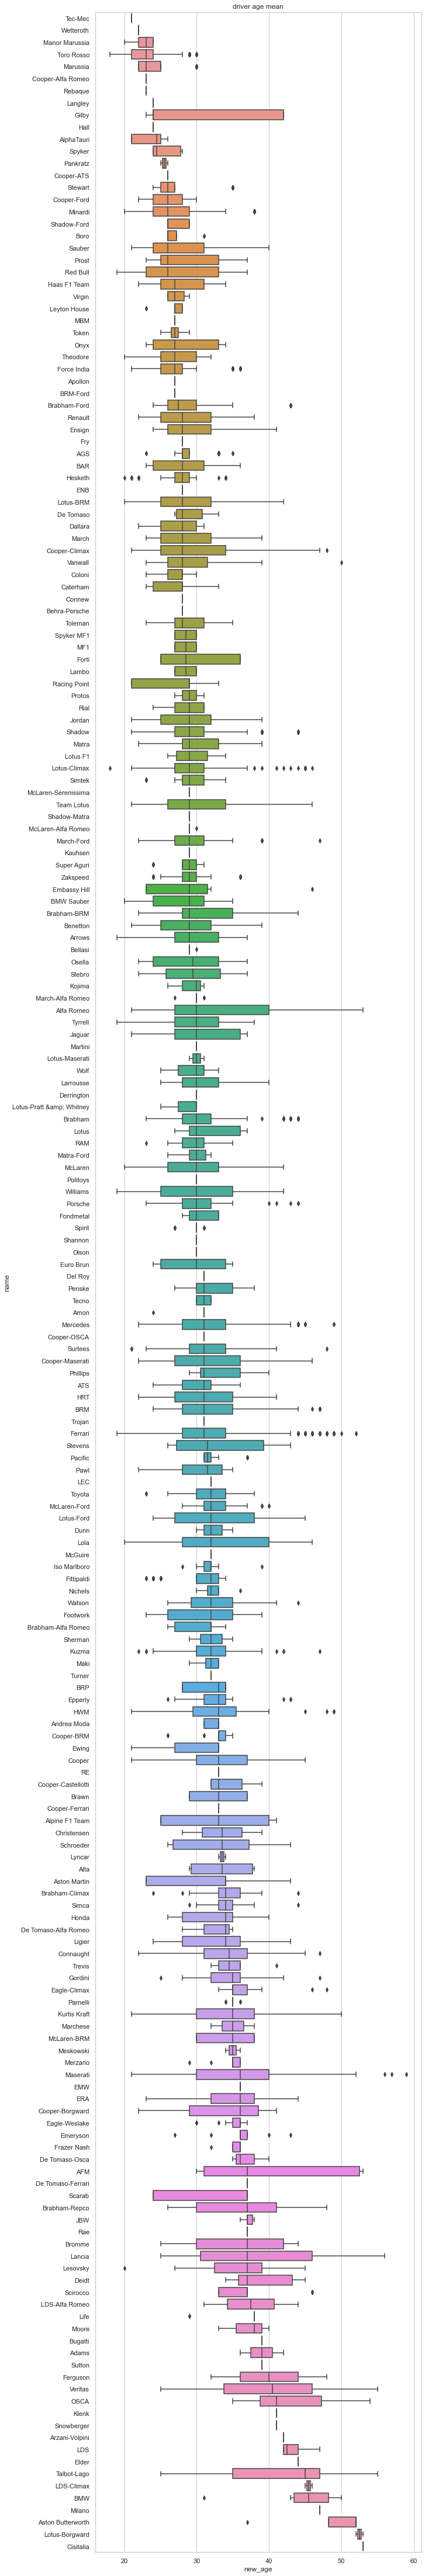

In [276]:
f, ax = plt.subplots(figsize=(10,80))
sns.set(style="whitegrid")
index = constructor_conc.groupby('name', as_index=False).agg({'new_age' : 'median'}).sort_values(by='new_age')['name']
graph = sns.boxplot(x='new_age', y = 'name', data=constructor_conc, order=index)
plt.title("driver age mean")

### Fastest Laps

In [277]:
##Creating data set
laptimes = lap_times.groupby('raceId',as_index=False).agg({'milliseconds' : 'max'})
A=[]
for i in laptimes.raceId.unique():
    x = laptimes.loc[laptimes['raceId']==i]['milliseconds']
    y = lap_times.loc[(lap_times['raceId']==i)&(lap_times['milliseconds']==int(x))]['driverId']
    A.append([i, int(x), int(y)])
Fastest_laps = pd.DataFrame(A, columns = ['raceId', 'milliseconds', 'driverId'])
constructors_temp = results[['raceId', 'driverId', 'constructorId']]
fastest_laps = pd.merge(Fastest_laps, constructors_temp,how='left', on=['raceId', 'driverId'])
fastest_laps = pd.merge(fastest_laps, drivers_list, how='left', on='driverId')
fastest_laps.rename(columns={'name':'drivers_name'}, inplace=True)
fastest_laps.head()

,raceId,milliseconds,driverId,constructorId,drivers_name
0,1,185713,18,23,Jenson Button
1,2,178640,8,6,Kimi Räikkönen
2,3,238709,15,7,Jarno Trulli
3,4,129178,6,3,Kazuki Nakajima
4,5,146562,22,23,Rubens Barrichello


#### Plotting a count graph to understand no of times driver acheived fastest laps

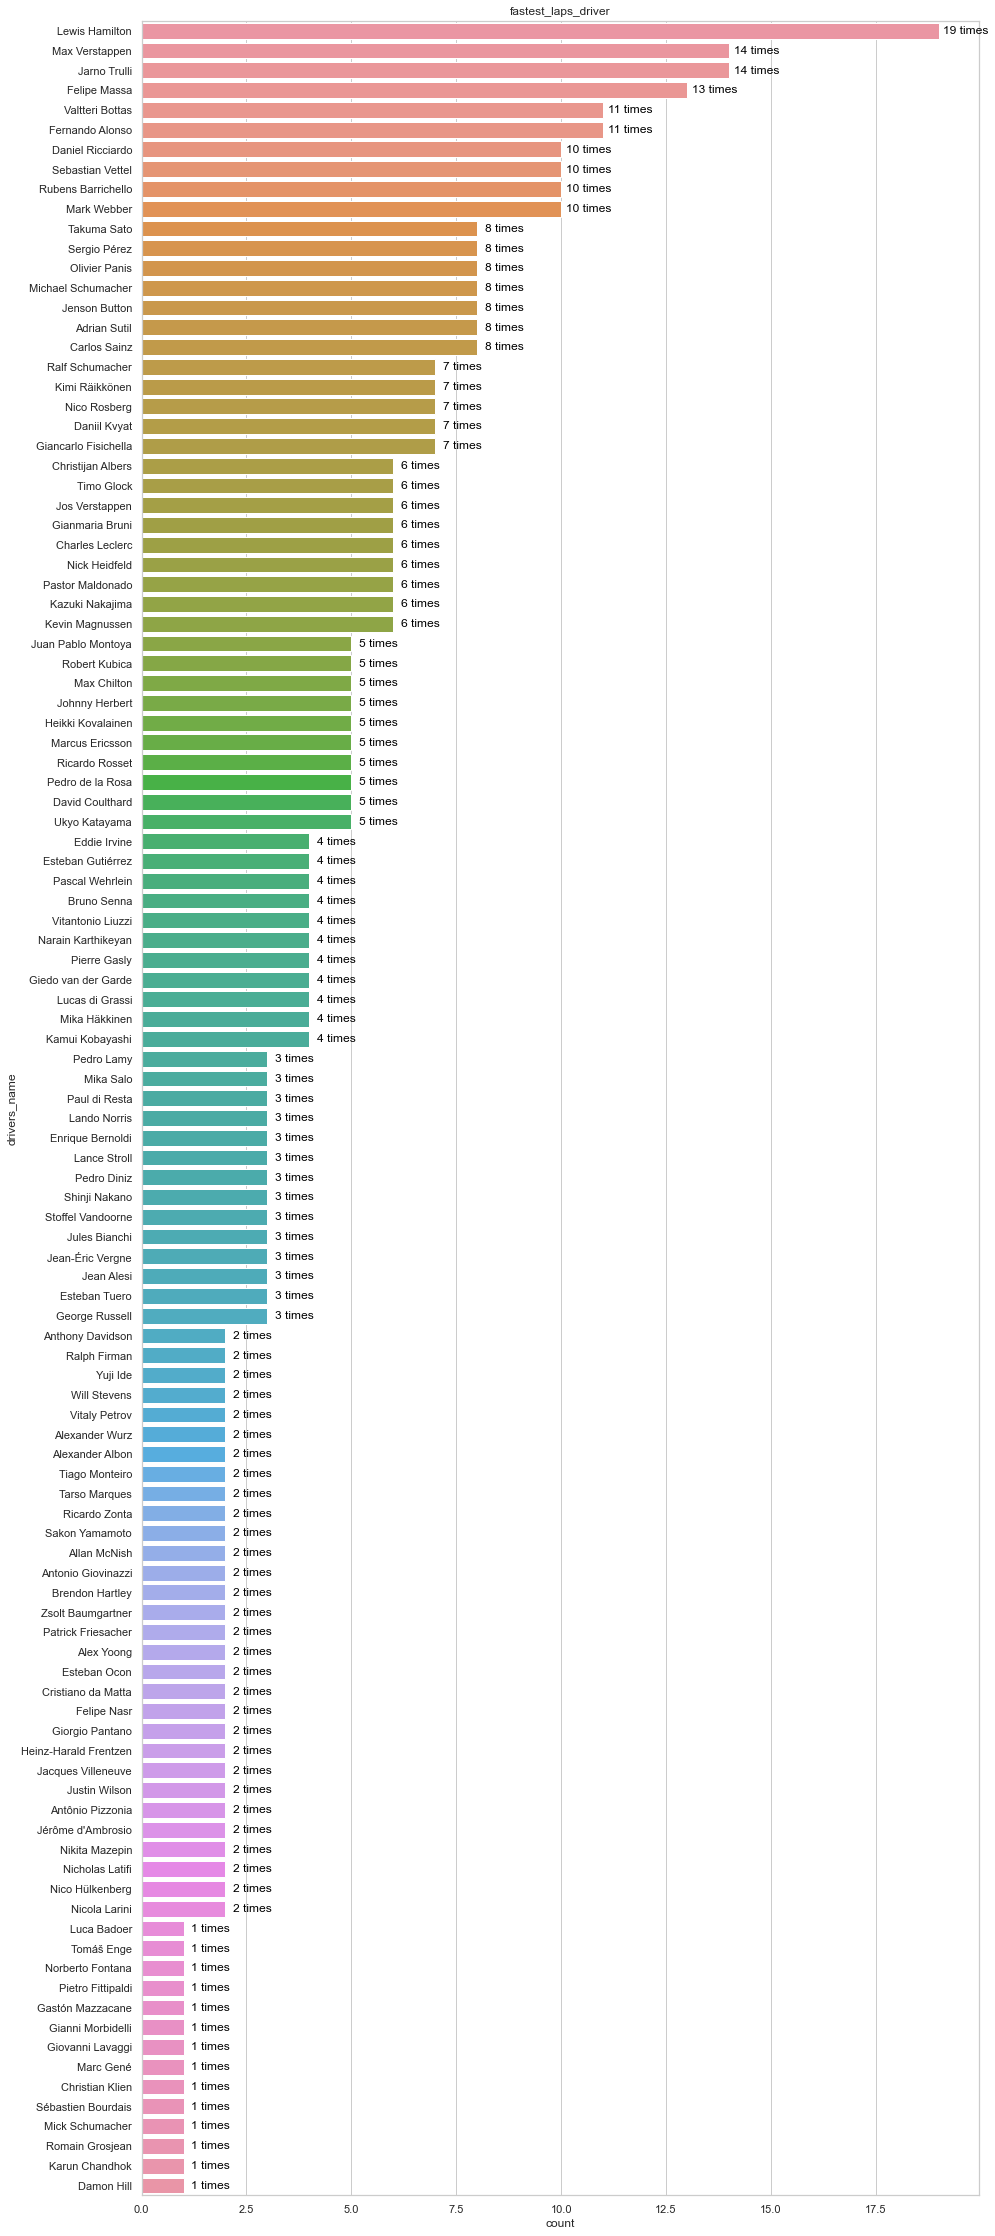

In [279]:
f, ax = plt.subplots(figsize=(15,40))
order = fastest_laps.groupby('drivers_name',as_index=False).agg({'raceId' :'count'}).sort_values(by='raceId',ascending=False)['drivers_name']
sns.set(style="whitegrid")
graph = sns.countplot(y='drivers_name', data=fastest_laps, order=order)
plt.title("fastest_laps_driver")
for p in ax.patches:
    ax.text(p.get_width()+0.65, p.get_y()+p.get_height()/2, '%d times'%(int(p.get_width())),fontsize=12, color='black', ha='center', va='center')
plt.show()

## Score Reports Constructor and driver

### Driver/Constructor Championship dash yearwise

In [280]:
#Creating dataframe
##yr = int(input("Enter the year as yyyy "))
yr = 2021
year_list = races[['raceId','year']]
yearwise_cresults = pd.merge(constructor_results, year_list, how='left', left_on='raceId', right_on='raceId')
yearwise_cresults = yearwise_cresults.loc[yearwise_cresults['year']==yr]
yearwise_cresults = yearwise_cresults.groupby('constructorId').agg({'points' : 'sum'})
yearwise_cresults = pd.merge(yearwise_cresults, constructors_list, how='left', left_on='constructorId', right_on='constructorId')
constructor_result_yr = yearwise_cresults[['name' , 'points']].sort_values(by='points',ascending=False)

driver_result_list = pd.merge(results, year_list, how='left', left_on='raceId', right_on='raceId')
driver_result_list = driver_result_list[['driverId', 'raceId' , 'year', 'points' ]]
driver_result_list = driver_result_list.loc[driver_result_list['year']==yr].groupby('driverId').agg({'points' : 'sum'})
driver_result_list = pd.merge(driver_result_list, drivers_list, how = 'left', left_on='driverId' , right_on = 'driverId')
driver_result_yr = driver_result_list[['name' , 'points']].sort_values(by='points',ascending=False)

In [284]:
print('results for year %d'%yr)
print(driver_result_yr) 
print(constructor_result_yr)


results for year 2021
                  name  points
8       Max Verstappen   388.5
0       Lewis Hamilton   385.5
7      Valtteri Bottas   219.0
5         Sergio Pérez   190.0
9         Carlos Sainz   163.5
15        Lando Norris   160.0
14     Charles Leclerc   159.0
6     Daniel Ricciardo   114.0
13        Pierre Gasly   110.0
1      Fernando Alonso    81.0
10        Esteban Ocon    74.0
4     Sebastian Vettel    43.0
11        Lance Stroll    34.0
18        Yuki Tsunoda    32.0
16      George Russell    16.0
2       Kimi Räikkönen    10.0
17     Nicholas Latifi     7.0
12  Antonio Giovinazzi     3.0
3        Robert Kubica     0.0
19      Nikita Mazepin     0.0
20     Mick Schumacher     0.0
             name  points
6        Mercedes   613.5
3        Red Bull   585.5
2         Ferrari   323.5
0         McLaren   275.0
9  Alpine F1 Team   155.0
8      AlphaTauri   142.0
5    Aston Martin    77.0
1        Williams    23.0
4      Alfa Romeo    13.0
7    Haas F1 Team     0.0


### Driver Statistics overall

In [421]:
#Driver_info_card

Name = 'Lewis Hamilton'
i = int(drivers_list.loc[drivers_list['name']==Name]['driverId'])
print('driver: %s \n'%Name)
your_driver = pd.merge(results, constructors_list, how='left', on='constructorId')
your_driver.rename(columns={'name' : 'constructors_name'}, inplace=True)
your_driver = pd.merge(your_driver, year_list, how='left', on='raceId')
your_driver = your_driver.loc[your_driver['driverId']==i]
Constructors_w = your_driver['constructors_name'].unique()
from_year = your_driver['year'].min()
to_year = your_driver['year'].max()
total_points = your_driver['points'].sum()

z = your_driver['rank']
r=[]
for i in z:
    if i!='\\N' and i!=0:
        r.append(int(i))
average_position = np.array(r).mean()

print("Constructors_worked_for  ")
for i in Constructors_w:
    f = your_driver.loc[your_driver['constructors_name']==i].year.min()
    t = your_driver.loc[your_driver['constructors_name']==i].year.max()
    print('for %s from %d to %d'%(i,f,t))
Total_poles = your_driver.loc[your_driver['position']=='1']['raceId'].count()
print("\n")
print("From year %s to year %s \n"%(from_year, to_year))
print('Total Races participated %d\n' %your_driver['year'].count())
print("total points in carrer %s \n"%total_points)
print("Average rank in carrer %s \n"%int(average_position))
print('Total pole positions in career - %d\n'%Total_poles)
print('Total accidents in career - %d\n'%your_driver.loc[(your_driver['statusId']==4)|(your_driver['statusId']==3)]['resultId'].count())


driver: Lewis Hamilton 

Constructors_worked_for  
for McLaren from 2007 to 2012
for Mercedes from 2013 to 2022


From year 2007 to year 2022 

Total Races participated 289

total points in carrer 4178.5 

Average rank in carrer 4 

Total pole positions in career - 103
Total accidents in career - 12

